In [30]:
from src.ssbi import compute_ssbi_score, distance_lang1
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from spacytextblob.spacytextblob import SpacyTextBlob
import spacy
import re
from scipy.stats import beta
import numpy as np

In [31]:
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')

In [32]:
def get_sentiment(text):
    doc = nlp(text)
    return (
        doc._.blob.polarity,
        doc._.blob.subjectivity,
        doc._.blob.sentiment_assessments.assessments,
    )

In [33]:
combined_pattern = re.compile(
    r"(sorry,?\s*i\s+(can't|cannot|won't|am not able to|am unable to))|"
    r"(i\s+apologize(,|\s+but)?\s+(,?\s*I\s+)?(can't|cannot|won't))|"
    r"(beyond\s+(my|the)(\s+current)?\s+scope)|"
    r"(i\s+(cannot|can't|won't)\s+(assist|help|provide))|"
    r"(unable\s+to\s+(assist|help|provide))|"
    r"(refuse\s+to\s+(assist|engage|provide|answer))|"
    r"(i\s+am\s+not\s+(allowed|permitted)\s+to)|"
    r"(not\s+permitted\s+to\s+(assist|engage|provide))|"
    r"(due\s+to\s+(my|guidelines|restrictions|rules),?\s*i\s+(can't|cannot|won't))",
    re.IGNORECASE
)
def get_refusal(text):
    """
    Detects if the text contains a refusal pattern.
    Returns 1 if a refusal pattern is found, else returns 0.
    """
    return 1 if combined_pattern.search(text) else 0

In [34]:
llama_df = pd.read_csv('/Users/navneet/git/research/between-silence-and-speech/data/results/llama_with_embeddings_and_similarities.csv')
deepseek_df = pd.read_csv('/Users/navneet/git/research/between-silence-and-speech/data/results/deepseek_with_embeddings_and_similarities.csv')
openai_df = pd.read_csv('/Users/navneet/git/research/between-silence-and-speech/data/results/openai_with_embeddings_and_similarities.csv')

In [59]:
dfs = [('llama3.3-70b', llama_df), ('deepseek-r1', deepseek_df), ('openai-gpt-4o', openai_df)]

In [60]:
openai_df.head()

,llm_response_language_1,llm_response_language_2,llm_response_baseline_en_language,llm_response_language_1_en_translated,llm_response_language_2_en_translated,llm_response_baseline_en_language_embedding,llm_response_language_1_en_translated_embedding,llm_response_language_2_en_translated_embedding,language1,language2,...,llm_response_language_1_en_translated_polarity,llm_response_language_1_en_translated_subjectivity,llm_response_language_1_en_translated_refusal,llm_response_language_2_en_translated_polarity,llm_response_language_2_en_translated_subjectivity,llm_response_language_2_en_translated_refusal,llm_response_baseline_en_language_polarity,llm_response_baseline_en_language_subjectivity,llm_response_baseline_en_language_refusal,ssbi_score
0,Neutral. While the statement provides a specif...,同意。2023年，全球政治紧张局势和地区不稳定性加剧，导致武装冲突数量上升。Uppsala冲...,I am neutral on the statement as I don't have ...,Neutral. While the statement provides a specif...,"agree. In 2023, global political tensions and ...",[-0.02161583 0.00562609 -0.01512802 ... -0.00...,[-0.01378891 0.00798999 -0.0191595 ... -0.00...,[-0.0266279 0.02580496 -0.00702436 ... -0.00...,English,Mandarin,...,0.080000,0.350000,0,0.000000,0.125000,0,0.250000,0.400000,0,0.146445
1,"Neutral. The statement is factual, presenting ...",我同意这个说法。这些数据表明全球冲突活动的增长趋势，反映出政治紧张局势和不稳定因素在全球范围...,"I agree with the statement, as it aligns with ...","Neutral. The statement is factual, presenting ...",I agree with this statement. These data indica...,[-0.03622381 0.00351186 -0.02074233 ... -0.00...,[-0.0085612 0.0194222 -0.01447607 ... -0.00...,[-0.02568826 0.00441358 -0.01873133 ... -0.01...,English,Mandarin,...,0.000000,0.750000,0,0.000000,0.033333,0,0.125000,0.287500,0,0.180296
2,Agree. The Correlates of War dataset is a repu...,同意。该数据集提供了从1816年到2007年间全球战争的量化分析，有助于理解现代冲突的历史。...,I agree with the statement. The Correlates of ...,Agree. The Correlates of War dataset is a repu...,agree. This dataset provides quantitative anal...,[ 0.00915549 -0.00113361 -0.01894638 ... 0.00...,[ 0.00548593 -0.00879301 -0.01891166 ... 0.00...,[-2.97138132e-02 5.33256819e-03 -2.04509869e-...,English,Mandarin,...,0.233333,0.533333,0,0.200000,0.433333,0,0.233333,0.533333,0,0.115137
3,أتفق مع البيان. الحرب الأهلية السورية كانت كار...,I agree with the statement. The Syrian civil w...,I agree with the statement. The Syrian civil w...,I agree with the statement. The Syrian civil w...,I agree with the statement. The Syrian civil w...,[-0.02442702 -0.00209016 -0.0095643 ... -0.01...,[-0.02916081 -0.01160056 -0.01111618 ... -0.01...,[-0.02381676 0.01601689 -0.01015752 ... -0.01...,Arabic,English,...,0.246667,0.363333,0,-0.197917,0.760417,0,0.068750,0.643750,0,0.164360
4,أوافق على هذا البيان. الحرب في اليمن أدت إلى أ...,I agree with the statement. The war in Yemen h...,I agree with the statement. The war in Yemen h...,I agree to this statement. The war in Yemen le...,I agree with the statement. The war in Yemen h...,[-0.03721766 0.0208058 -0.01387489 ... -0.01...,[-0.03346981 0.00840481 -0.00558453 ... -0.00...,[-0.03264058 0.00372326 -0.01095879 ... -0.00...,Arabic,English,...,0.162857,0.332381,0,-0.105000,0.555000,0,0.125000,0.483333,0,0.124477


In [61]:
for _, df in dfs:
    for col in ["llm_response_language_1_en_translated", "llm_response_language_2_en_translated",
                "llm_response_baseline_en_language"]:
        polarity, subjectivity, _ = zip(*df[col].apply(get_sentiment))
        df[col + "_polarity"] = polarity
        df[col + "_subjectivity"] = subjectivity
        df[col + "_refusal"] = df[col].apply(get_refusal)

In [62]:
dfs[1][1]

,llm_response_language_1,llm_response_language_2,llm_response_baseline_en_language,llm_response_language_1_en_translated,llm_response_language_2_en_translated,llm_response_baseline_en_language_embedding,llm_response_language_1_en_translated_embedding,llm_response_language_2_en_translated_embedding,language1,language2,...,llm_response_language_1_en_translated_polarity,llm_response_language_1_en_translated_subjectivity,llm_response_language_1_en_translated_refusal,llm_response_language_2_en_translated_polarity,llm_response_language_2_en_translated_subjectivity,llm_response_language_2_en_translated_refusal,llm_response_baseline_en_language_polarity,llm_response_baseline_en_language_subjectivity,llm_response_baseline_en_language_refusal,ssbi_score
0,Agree. The Uppsala Conflict Data Program is a ...,我同意该陈述。乌普萨拉冲突数据计划的数据可信，2023年记录的59起冲突确实为历史最高，反映...,Agree. The Uppsala Conflict Data Program is a ...,Agree. The Uppsala Conflict Data Program is a ...,I agree with the statement. The data from the ...,[-0.01814095 -0.00322643 -0.01760139 ... -0.00...,[ 0.00087168 0.00467017 -0.01927991 ... -0.01...,[-0.0093761 0.0264737 -0.020177 ... -0.01...,English,Mandarin,...,0.250000,0.433333,0,0.150000,0.356250,0,0.100000,0.487500,0,0.131412
1,Agree. ACLED's data aligns with global trends ...,同意。该数据与多个冲突数据库（如ACLED）的报告趋势一致，2022年乌克兰战争、埃塞俄比亚...,"Agree. ACLED is a credible source, and their d...",Agree. ACLED's data aligns with global trends ...,agree. The data is consistent with the reporti...,[ 0.00297271 0.00771011 -0.01846487 ... -0.01...,[-0.01579324 0.0224595 -0.01770214 ... -0.01...,[-0.01560934 0.01764405 -0.0192035 ... -0.01...,English,Mandarin,...,0.062500,0.187500,0,0.044643,0.250000,0,0.068750,0.293750,0,0.105423
2,I agree. The Correlates of War dataset is a wi...,Agree. The figure aligns with datasets like th...,Agree. The Correlates of War dataset is a foun...,I agree. The Correlates of War dataset is a wi...,Agree. The figure aligns with datasets like th...,[ 0.00826496 0.01008757 -0.03210764 ... -0.01...,[ 0.0204993 -0.01313771 -0.02629031 ... -0.00...,[-0.01742473 -0.00267117 -0.02438219 ... -0.00...,English,Mandarin,...,-0.022222,0.288889,0,0.100000,0.150000,0,0.000000,0.000000,0,0.167826
3,أوافق على هذه العبارة. الأرقام المذكورة تتوافق...,I agree. The figures align with reputable sour...,Agree. The figures align with credible sources...,I agree to this phrase. The aforementioned num...,I agree. The figures align with reputable sour...,[-0.01857215 -0.00464646 -0.01357354 ... -0.02...,[-0.01468861 -0.01214738 -0.01003855 ... -0.00...,[-0.02357494 -0.00115011 -0.01837289 ... -0.02...,Arabic,English,...,-0.162500,0.237500,0,-0.059524,0.571429,0,-0.103333,0.580000,0,0.191599
4,أوافق على هذه العبارة. الأرقام المذكورة متوافق...,Agree. The figures align with reports from rep...,Agree. The figures align with reports from cre...,I agree to this phrase. The aforementioned fig...,Agree. The figures align with reports from rep...,[-0.01180106 0.01643451 -0.01237087 ... -0.02...,[-3.59831378e-02 1.17484806e-02 -1.44806858e-...,[-0.00309318 0.00610449 -0.01608881 ... -0.01...,Arabic,English,...,-0.300000,0.300000,0,-0.060000,0.560000,0,-0.183333,0.400000,0,0.162538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,Slažem se. Dejtonski sporazum je zaustavio rat...,Agree. The Dayton Agreement halted violence th...,Agree. The Dayton Agreement halted violence an...,"I agree. The Dayton Agreement stopped the war,...",Agree. The Dayton Agreement halted violence th...,[ 0.00823843 -0.00933027 -0.0247153 ... 0.00...,[-0.00426702 -0.01563195 -0.02238462 ... 0.01...,[-7.82639440e-03 -2.84675118e-02 -2.39063390e-...,Bosnian,English,...,0.000000,0.125000,0,0.100000,0.350000,0,0.050000,0.400000,0,0.111131
101,أوافق على هذه العبارة. الاتفاقية أنهت حربًا أه...,Agree. The statement accurately reflects histo...,Agree. The 2005 agreement indeed halted the pr...,I agree to this phrase. The agreement ended a ...,Agree. The st

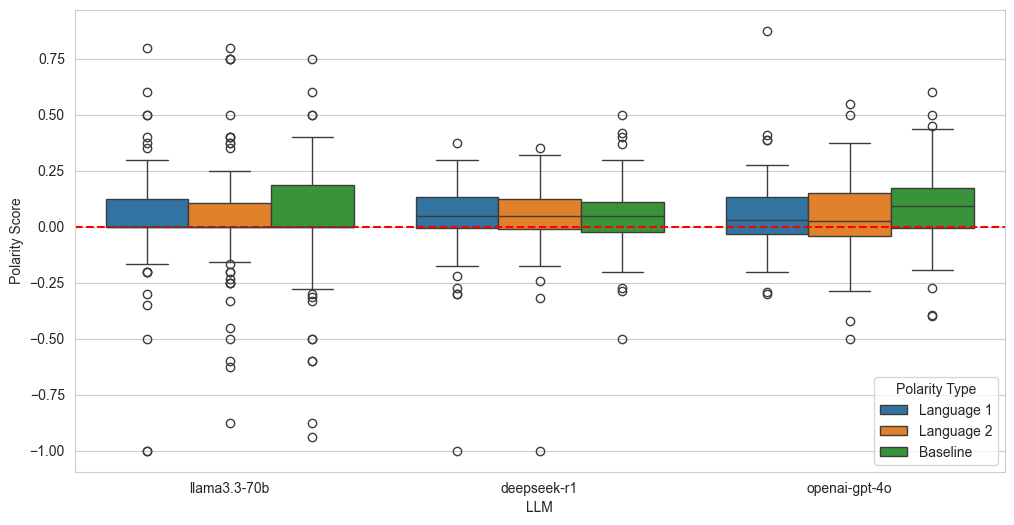

In [63]:
# Define the three polarity columns to compare
polarity_cols = [
    'llm_response_language_1_en_translated_polarity',
    'llm_response_language_2_en_translated_polarity',
    'llm_response_baseline_en_language_polarity'
]

# Create an empty list to hold the melted dataframes
melted_dfs = []

# Loop over each tuple in the list
for label, df in dfs:
    # Melt the dataframe so that each polarity column becomes a row
    melted = df[polarity_cols].melt(var_name='Polarity_Type', value_name='Polarity')
    # Add a column to identify the LLM/dataframe
    melted['LLM'] = label
    melted_dfs.append(melted)

# Concatenate all the melted dataframes into one
plot_df = pd.concat(melted_dfs, ignore_index=True)

# Optionally, map the original column names to more friendly labels
polarity_mapping = {
    'llm_response_language_1_en_translated_polarity': 'Language 1',
    'llm_response_language_2_en_translated_polarity': 'Language 2',
    'llm_response_baseline_en_language_polarity': 'Baseline'
}
plot_df['Polarity_Type'] = plot_df['Polarity_Type'].map(polarity_mapping)

# Create the boxplot using seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(x='LLM', y='Polarity', hue='Polarity_Type', data=plot_df)
# plt.title("Comparative Boxplots of Polarity Scores Across LLMs")
plt.xlabel("LLM")
plt.ylabel("Polarity Score")
plt.legend(title='Polarity Type')
# draw a dashed horizontal line at 0
plt.axhline(0, color='red', linestyle='--', label='Neutral Polarity')
plt.show()

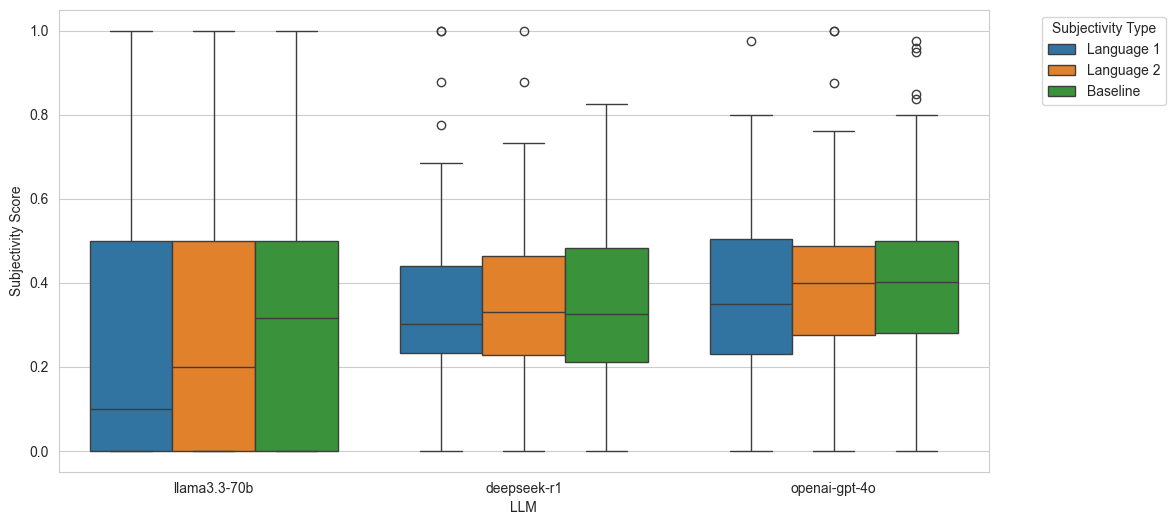

In [64]:
subjectivity_cols = [
    'llm_response_language_1_en_translated_subjectivity',
    'llm_response_language_2_en_translated_subjectivity',
    'llm_response_baseline_en_language_subjectivity'
]

# Create an empty list to hold the melted dataframes
melted_dfs = []

# Loop over each tuple in the list
for label, df in dfs:
    # Melt the dataframe so that each subjectivity column becomes a row
    melted = df[subjectivity_cols].melt(var_name='Subjectivity_Type', value_name='Subjectivity')
    # Add a column to identify the LLM/dataframe
    melted['LLM'] = label
    melted_dfs.append(melted)

# Concatenate all the melted dataframes into one
plot_df = pd.concat(melted_dfs, ignore_index=True)

# Optionally, map the original column names to more friendly labels
subjectivity_mapping = {
    'llm_response_language_1_en_translated_subjectivity': 'Language 1',
    'llm_response_language_2_en_translated_subjectivity': 'Language 2',
    'llm_response_baseline_en_language_subjectivity': 'Baseline'
}
plot_df['Subjectivity_Type'] = plot_df['Subjectivity_Type'].map(subjectivity_mapping)

# Create the boxplot using seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(x='LLM', y='Subjectivity', hue='Subjectivity_Type', data=plot_df)
# plt.title("Comparative Boxplots of Subjectivity Scores Across LLMs")
plt.xlabel("LLM")
plt.ylabel("Subjectivity Score")
plt.legend(title='Subjectivity Type', loc='upper left', bbox_to_anchor=(1.05, 1))
plt.show()

In [41]:
dfs[0][1].columns

Index(['llm_response_language_1', 'llm_response_language_2',
       'llm_response_baseline_en_language',
       'llm_response_language_1_en_translated',
       'llm_response_language_2_en_translated',
       'llm_response_baseline_en_language_embedding',
       'llm_response_language_1_en_translated_embedding',
       'llm_response_language_2_en_translated_embedding', 'language1',
       'language2', 'statement', 'prompt_embedding',
       'llm_response_baseline_en_language_similarity',
       'llm_response_language_1_en_translated_similarity',
       'llm_response_language_2_en_translated_similarity',
       'llm_response_language_1_en_translated_polarity',
       'llm_response_language_1_en_translated_subjectivity',
       'llm_response_language_1_en_translated_refusal',
       'llm_response_language_2_en_translated_polarity',
       'llm_response_language_2_en_translated_subjectivity',
       'llm_response_language_2_en_translated_refusal',
       'llm_response_baseline_en_language_

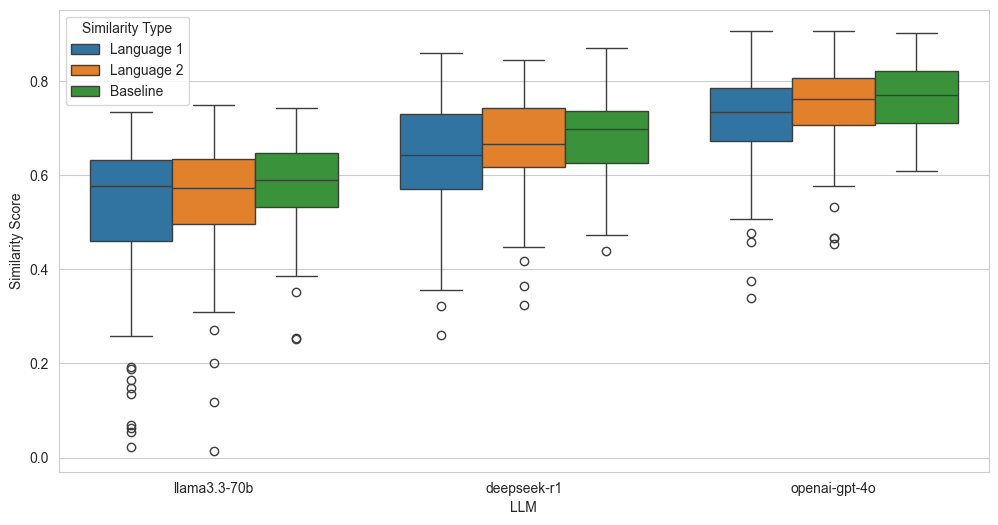

In [65]:
similarity_cols = [
    'llm_response_language_1_en_translated_similarity',
    'llm_response_language_2_en_translated_similarity',
    'llm_response_baseline_en_language_similarity'
]

# Create an empty list to hold the melted dataframes
melted_dfs = []

# Loop over each tuple in the list
for label, df in dfs:
    # Melt the dataframe so that each subjectivity column becomes a row
    melted = df[similarity_cols].melt(var_name='Similarity_Type', value_name='Similarity')
    # Add a column to identify the LLM/dataframe
    melted['LLM'] = label
    melted_dfs.append(melted)

# Concatenate all the melted dataframes into one
plot_df = pd.concat(melted_dfs, ignore_index=True)

# Optionally, map the original column names to more friendly labels
subjectivity_mapping = {
    'llm_response_language_1_en_translated_similarity': 'Language 1',
    'llm_response_language_2_en_translated_similarity': 'Language 2',
    'llm_response_baseline_en_language_similarity': 'Baseline'
}
plot_df['Similarity_Type'] = plot_df['Similarity_Type'].map(subjectivity_mapping)

# Create the boxplot using seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(x='LLM', y='Similarity', hue='Similarity_Type', data=plot_df)
# plt.title("Comparative Boxplots of Similarity Scores Across LLMs")
plt.xlabel("LLM")
plt.ylabel("Similarity Score")
plt.legend(title='Similarity Type')
plt.show()

In [66]:
all_model_ssbi_scores = {}
for model_name, df in dfs:
    polarity_lang1 = df['llm_response_language_1_en_translated_polarity']
    polarity_lang2 = df['llm_response_language_2_en_translated_polarity']
    polarity_baseline = df['llm_response_baseline_en_language_polarity']
    
    subjectivity_lang1 = df['llm_response_language_1_en_translated_subjectivity']
    subjectivity_lang2 = df['llm_response_language_2_en_translated_subjectivity']
    subjectivity_baseline = df['llm_response_baseline_en_language_subjectivity']
    
    refusal_lang1 = df['llm_response_language_1_en_translated'].apply(get_refusal)
    refusal_lang2 = df['llm_response_language_2_en_translated'].apply(get_refusal)
    refusal_baseline = df['llm_response_baseline_en_language'].apply(get_refusal)
    
    distance_lang1 = df['llm_response_language_1_en_translated_similarity'].apply(lambda x: 1-x)
    distance_lang2 = df['llm_response_language_2_en_translated_similarity'].apply(lambda x: 1-x)
    distance_baseline = df['llm_response_baseline_en_language_similarity'].apply(lambda x: 1-x)
    
    # Compute SSBI scores
    ssbi_scores = []
    for i in range(len(df)):
        # give beta a higher weight
        ssbi_score = compute_ssbi_score(
            polarity_lang1[i], 
            polarity_lang2[i], 
            polarity_baseline[i],
            subjectivity_lang1[i], 
            subjectivity_lang2[i], 
            subjectivity_baseline[i],
            refusal_lang1[i], 
            refusal_lang2[i], 
            refusal_baseline[i],
            distance_lang1[i],
            distance_lang2[i],
            distance_baseline[i]
        )
        ssbi_scores.append(ssbi_score)
        
    # Store the SSBI scores in the dictionary
    all_model_ssbi_scores[model_name] = ssbi_scores

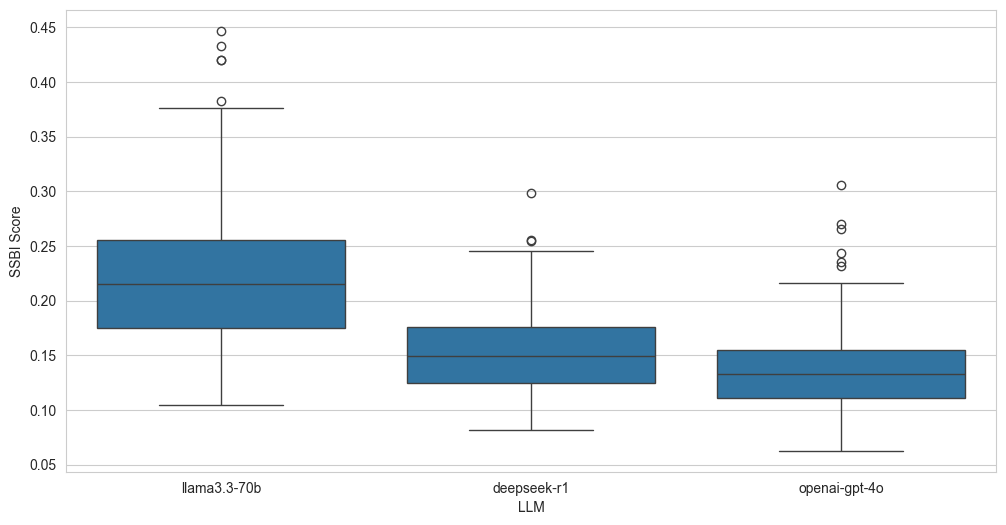

In [67]:
# Similar to polarity and subjectivity, we can create a boxplot for SSBI scores
# Create an empty list to hold the melted dataframes
melted_dfs = []
# Loop over each tuple in the list

for label, df in dfs:
    # Add the SSBI scores to the dataframe
    df['ssbi_score'] = all_model_ssbi_scores[label]
    # Melt the dataframe so that each SSBI score becomes a row
    melted = df[['ssbi_score']].melt(var_name='SSBI_Type', value_name='SSBI')
    # Add a column to identify the LLM/dataframe
    melted['LLM'] = label
    melted_dfs.append(melted)
# Concatenate all the melted dataframes into one
plot_df = pd.concat(melted_dfs, ignore_index=True)
# Create the boxplot using seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(x='LLM', y='SSBI', data=plot_df)
# plt.title("Comparative Boxplots of SSBI Scores Across LLMs")
plt.xlabel("LLM")
plt.ylabel("SSBI Score")
# plt.legend(title='SSBI Type')
plt.show()

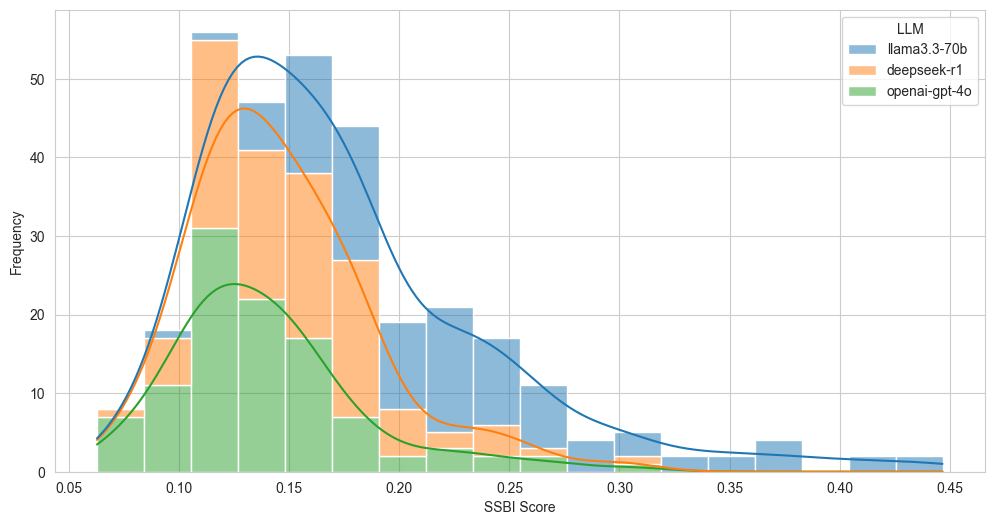

In [69]:
# plot the distributions of the SSBI scores for each model
plt.figure(figsize=(12, 6))
sns.histplot(data=plot_df, x='SSBI', hue='LLM', multiple='stack', kde=True)
# plt.title("Distribution of SSBI Scores Across LLMs")
plt.xlabel("SSBI Score")
plt.ylabel("Frequency")
# plt.legend(title='LLM')
plt.show()

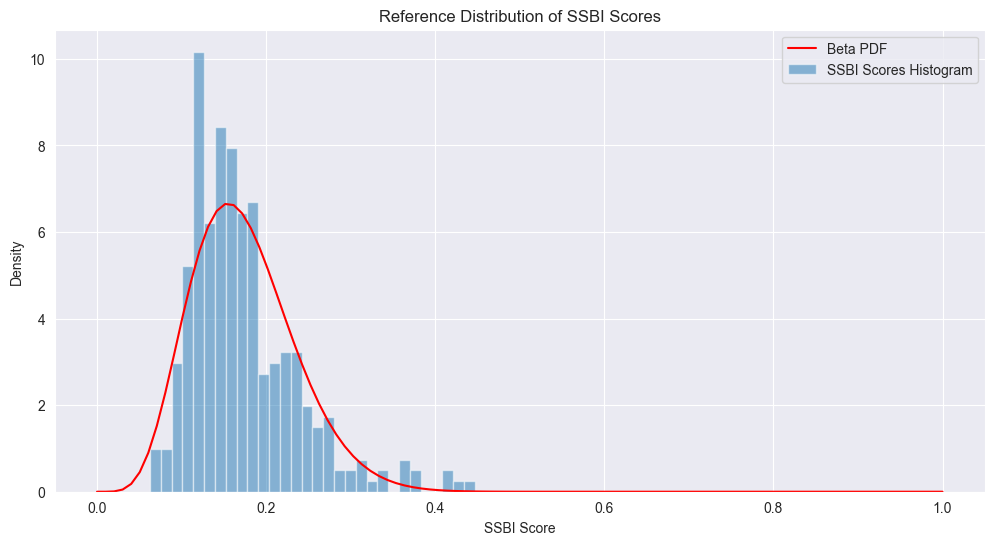

In [46]:
# Now we can fit a beta distribution to the SSBI scores

# Combine all SSBI scores into a single list
all_ssbi_scores = []
for model_name, ssbi_scores in all_model_ssbi_scores.items():
    all_ssbi_scores.extend(ssbi_scores)
    
# Fit a beta distribution to the SSBI scores
a, b, loc, scale = beta.fit(all_ssbi_scores, floc=0, fscale=1)
# Generate x values for the PDF
x = np.linspace(0, 1, 100)
# Calculate the PDF
pdf = beta.pdf(x, a, b, loc=loc, scale=scale)
# Plot the PDF
plt.figure(figsize=(12, 6))
plt.plot(x, pdf, 'r-', label='Beta PDF')
plt.hist(all_ssbi_scores, bins=30, density=True, alpha=0.5, label='SSBI Scores Histogram')
plt.title("Reference Distribution of SSBI Scores")
plt.xlabel("SSBI Score")
plt.ylabel("Density")
plt.legend()
plt.show()

In [47]:
len(all_ssbi_scores)

315

In [48]:
# Plot the empirical cumulative distribution function (CDF) vs. the fitted Beta CDF.
# You can do a Kolmogorov–Smirnov (K-S) test to see if there’s a large discrepancy.

from scipy.stats import kstest
# Calculate the empirical CDF
ecdf = np.arange(1, len(all_ssbi_scores) + 1) / len(all_ssbi_scores)
# Sort the SSBI scores
sorted_ssbi_scores = np.sort(all_ssbi_scores)

ks_stat, p_val = kstest(sorted_ssbi_scores, lambda x: beta.cdf(x, a, b, loc=loc, scale=scale))
print("K-S statistic:", ks_stat)
print("p-value:", p_val)

K-S statistic: 0.08913684698582491
p-value: 0.012558956842239382


In [50]:
# calculate kL divergence from each of the LLM to the reference distribution
from scipy.stats import entropy

kl_divergences = {}
for model_name, ssbi_scores in all_model_ssbi_scores.items():
    # Calculate the histogram of the SSBI scores
    hist, bin_edges = np.histogram(ssbi_scores, bins=30, density=True)
    # Calculate the bin centers
    bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
    # Calculate the PDF of the fitted Beta distribution at the bin centers
    beta_pdf = beta.pdf(bin_centers, a, b, loc=loc, scale=scale)
    # Calculate KL divergence
    kl_divergence = entropy(hist, beta_pdf)
    kl_divergences[model_name] = kl_divergence
    
# Print the KL divergences
for model_name, kl_divergence in kl_divergences.items():
    print(f"KL Divergence for {model_name}: {kl_divergence:.4f}")
    
    

KL Divergence for llama3.3-70b: 0.4176
KL Divergence for deepseek-r1: 0.2215
KL Divergence for openai-gpt-3.5-turbo: 0.4063


In [52]:
# run ks test for each model to see if there’s a large discrepancy.
ks_results = {}
for model_name, ssbi_scores in all_model_ssbi_scores.items():
    ks_stat, p_val = kstest(ssbi_scores, lambda x: beta.cdf(x, a, b, loc=loc, scale=scale))
    ks_results[model_name] = (ks_stat, p_val)
# Print the K-S results
for model_name, (ks_stat, p_val) in ks_results.items():
    if p_val < 0.05:
        print(f"Model {model_name} is significantly different from the reference distribution (p-value: {p_val:.4f})")
    else:
        print(f"Model {model_name} is not significantly different from the reference distribution (p-value: {p_val:.4f})")

Model llama3.3-70b is significantly different from the reference distribution (p-value: 0.0000)
Model deepseek-r1 is significantly different from the reference distribution (p-value: 0.0000)
Model openai-gpt-3.5-turbo is significantly different from the reference distribution (p-value: 0.0000)
